# DH140: Census Data Exploration
by Pawan (Sine) Polcharoen

This data exploration focuses around census data. Specifically, I will be looking at the Language profile of the United States. Since my project revolves around top Spotify songs across the world, I have extracted the languages that I believe could show up within the most popular songs. These languages include: English, Spanish, French, Portugese, Chinese, Japanese, and Korean. From the information gathered during this exploration, I hope to see in my project whether spoken language has an effect on what music people listen to and how they perceive it. In this exploration, I will be working to understand the structure of the data set and what it contains, as well as what visualizations I can create from it.

## Setting Up

First, I am importing all the libraries I intend to use.

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Then, I am importing the geojson data file.

In [3]:
gdf = gpd.read_file('data/USA_lang_census.geojson')

## Preliminary Exploration

In [49]:
# Data set Dimensions
gdf.shape

(51, 30)

In [50]:
# Preview
gdf.head()

,geoid,State,Total,Speak only English,Spanish:,"Speak English ""very well""","Speak English less than ""very well""",French (incl. Cajun),"Speak English ""very well""","Speak English less than ""very well""",...,"Speak English ""very well""","Speak English less than ""very well""",geometry,Percent Speak only English,Percent Spanish,Percent French,Percent Portuguese,Percent Chinese,Percent Japanese,Percent Korean
1,04000US01,Alabama,4583063.0,4338502.0,153715.0,87283.0,66432.0,6895.0,5289.0,1606.0,...,3547.0,5665.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",94.663809,3.353980,0.150445,0.035937,0.211976,0.041042,0.201001
2,04000US02,Alaska,683831.0,573897.0,25099.0,18921.0,6178.0,1664.0,1532.0,132.0,...,1801.0,2057.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",83.923806,3.670351,0.243335,0.025152,0.202097,0.187327,0.564174
3,04000US04,Arizona,6616331.0,4820345.0,1352104.0,915165.0,436939.0,16540.0,13083.0,3457.0,...,5238.0,4759.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",72.855258,20.435858,0.249987,0.062346,0.527090,0.115290,0.151096
4,04000US05,Arkansas,2809734.0,2598218.0,152982.0,85157.0,67825.0,3438.0,2720.0,718.0,...,815.0,872.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",92.472028,5.444715,0.122360,0.029576,0.195143,0.037334,0.060041
5,04000US06,California,36831969.0,20539952.0,10578516.0,6385443.0,4193073.0,128107.0,111001.0,17106.0,...,161343.0,201235.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",55.766641,28.721017,0.347815,0.236637,3.382836,0.378429,0.984411


In [51]:
# Data Types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geoid                                 51 non-null     object  
 1   State                                 51 non-null     object  
 2   Total                                 51 non-null     float64 
 3   Speak only English                    51 non-null     float64 
 4   Spanish:                              51 non-null     float64 
 5   Speak English "very well"             51 non-null     float64 
 6   Speak English less than "very well"   51 non-null     float64 
 7   French (incl. Cajun)                  51 non-null     float64 
 8   Speak English "very well"             51 non-null     float64 
 9   Speak English less than "very well"   51 non-null     float64 
 10  Portuguese:                           51 non-null     float64 
 11  

From a few preliminary commands, I now know the dimensions, structure, columns, and data types in my data set.

## Removing a Row

In the following `drop` command, I will be removing the row that contains data for the entire country. This row is problematic, so removing it will help to better represent the data at a consistent scale.

In [8]:
gdf = gdf.drop([0])

In [9]:
gdf.head()

,geoid,name,B16001001,"B16001001, Error",B16001002,"B16001002, Error",B16001003,"B16001003, Error",B16001004,"B16001004, Error",...,"B16001124, Error",B16001125,"B16001125, Error",B16001126,"B16001126, Error",B16001127,"B16001127, Error",B16001128,"B16001128, Error",geometry
1,04000US01,Alabama,4583063.0,535.0,4338502.0,3465.0,153715.0,2807.0,87283.0,2370.0,...,227.0,58.0,54.0,1378.0,438.0,874.0,265.0,504.0,225.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,683831.0,239.0,573897.0,2448.0,25099.0,1408.0,18921.0,1096.0,...,942.0,4871.0,457.0,560.0,230.0,456.0,191.0,104.0,86.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,6616331.0,304.0,4820345.0,11431.0,1352104.0,10205.0,915165.0,8657.0,...,1224.0,3865.0,444.0,4245.0,687.0,3329.0,493.0,916.0,329.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2809734.0,567.0,2598218.0,3438.0,152982.0,2497.0,85157.0,2343.0,...,183.0,89.0,100.0,526.0,152.0,424.0,143.0,102.0,71.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,36831969.0,611.0,20539952.0,52778.0,10578516.0,35483.0,6385443.0,23919.0,...,592.0,873.0,265.0,35324.0,2271.0,21428.0,1505.0,13896.0,1305.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


As shown in the `head` command above, the country row has been removed.

## Extracting Specific Columns
First, I will use `list` to get a list of all the column names.

In [10]:
list(gdf)

['geoid',
 'name',
 'B16001001',
 'B16001001, Error',
 'B16001002',
 'B16001002, Error',
 'B16001003',
 'B16001003, Error',
 'B16001004',
 'B16001004, Error',
 'B16001005',
 'B16001005, Error',
 'B16001006',
 'B16001006, Error',
 'B16001007',
 'B16001007, Error',
 'B16001008',
 'B16001008, Error',
 'B16001009',
 'B16001009, Error',
 'B16001010',
 'B16001010, Error',
 'B16001011',
 'B16001011, Error',
 'B16001012',
 'B16001012, Error',
 'B16001013',
 'B16001013, Error',
 'B16001014',
 'B16001014, Error',
 'B16001015',
 'B16001015, Error',
 'B16001016',
 'B16001016, Error',
 'B16001017',
 'B16001017, Error',
 'B16001018',
 'B16001018, Error',
 'B16001019',
 'B16001019, Error',
 'B16001020',
 'B16001020, Error',
 'B16001021',
 'B16001021, Error',
 'B16001022',
 'B16001022, Error',
 'B16001023',
 'B16001023, Error',
 'B16001024',
 'B16001024, Error',
 'B16001025',
 'B16001025, Error',
 'B16001026',
 'B16001026, Error',
 'B16001027',
 'B16001027, Error',
 'B16001028',
 'B16001028, Error',
 

Next, I am creating a new object containing the seven languages I want to evaluate further.

In [11]:
columns_to_keep = ['geoid',
 'name',
 'B16001001',
 'B16001002',
 'B16001003',
 'B16001004',
 'B16001005',
 'B16001006',
 'B16001007',
 'B16001008',
 'B16001015',
 'B16001016',
 'B16001017',
 'B16001075',
 'B16001076',
 'B16001077',
 'B16001078',
 'B16001079',
 'B16001080',
 'B16001081',
 'B16001082',
 'B16001083',
 'geometry']

With this new object, I can save the columns I want to keep into the data frame and use the command `head` to confirm.

In [12]:
gdf = gdf[columns_to_keep]

In [13]:
gdf.head()

,geoid,name,B16001001,B16001002,B16001003,B16001004,B16001005,B16001006,B16001007,B16001008,...,B16001075,B16001076,B16001077,B16001078,B16001079,B16001080,B16001081,B16001082,B16001083,geometry
1,04000US01,Alabama,4583063.0,4338502.0,153715.0,87283.0,66432.0,6895.0,5289.0,1606.0,...,9715.0,4269.0,5446.0,1881.0,1080.0,801.0,9212.0,3547.0,5665.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,683831.0,573897.0,25099.0,18921.0,6178.0,1664.0,1532.0,132.0,...,1382.0,844.0,538.0,1281.0,958.0,323.0,3858.0,1801.0,2057.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,6616331.0,4820345.0,1352104.0,915165.0,436939.0,16540.0,13083.0,3457.0,...,34874.0,18302.0,16572.0,7628.0,5284.0,2344.0,9997.0,5238.0,4759.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2809734.0,2598218.0,152982.0,85157.0,67825.0,3438.0,2720.0,718.0,...,5483.0,3058.0,2425.0,1049.0,540.0,509.0,1687.0,815.0,872.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,36831969.0,20539952.0,10578516.0,6385443.0,4193073.0,128107.0,111001.0,17106.0,...,1245965.0,562601.0,683364.0,139383.0,78845.0,60538.0,362578.0,161343.0,201235.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


## Renaming Columns
Recoding the column names will allow me to more easily identify columns and extract them in later exploration and visualization. Using `columns` allows me to assign a new name to each of the columns in my cut-down data frame.

In [14]:
gdf.columns = ['geoid',
 'State',
 'Total',
 'Speak only English',
 'Spanish:',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'French (incl. Cajun)',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'Portuguese:',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'Chinese (incl. Mandarin, Cantonese):',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'Japanese:',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'Korean:',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'geometry']

In [15]:
gdf.head()

,geoid,State,Total,Speak only English,Spanish:,"Speak English ""very well""","Speak English less than ""very well""",French (incl. Cajun),"Speak English ""very well""","Speak English less than ""very well""",...,"Chinese (incl. Mandarin, Cantonese):","Speak English ""very well""","Speak English less than ""very well""",Japanese:,"Speak English ""very well""","Speak English less than ""very well""",Korean:,"Speak English ""very well""","Speak English less than ""very well""",geometry
1,04000US01,Alabama,4583063.0,4338502.0,153715.0,87283.0,66432.0,6895.0,5289.0,1606.0,...,9715.0,4269.0,5446.0,1881.0,1080.0,801.0,9212.0,3547.0,5665.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,683831.0,573897.0,25099.0,18921.0,6178.0,1664.0,1532.0,132.0,...,1382.0,844.0,538.0,1281.0,958.0,323.0,3858.0,1801.0,2057.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,6616331.0,4820345.0,1352104.0,915165.0,436939.0,16540.0,13083.0,3457.0,...,34874.0,18302.0,16572.0,7628.0,5284.0,2344.0,9997.0,5238.0,4759.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2809734.0,2598218.0,152982.0,85157.0,67825.0,3438.0,2720.0,718.0,...,5483.0,3058.0,2425.0,1049.0,540.0,509.0,1687.0,815.0,872.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,36831969.0,20539952.0,10578516.0,6385443.0,4193073.0,128107.0,111001.0,17106.0,...,1245965.0,562601.0,683364.0,139383.0,78845.0,60538.0,362578.0,161343.0,201235.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


As shown in the `head` command above, the columns have been renamed successfully.

## Checking the data's integrity

In [16]:
random_tract = gdf.sample()
random_tract

,geoid,State,Total,Speak only English,Spanish:,"Speak English ""very well""","Speak English less than ""very well""",French (incl. Cajun),"Speak English ""very well""","Speak English less than ""very well""",...,"Chinese (incl. Mandarin, Cantonese):","Speak English ""very well""","Speak English less than ""very well""",Japanese:,"Speak English ""very well""","Speak English less than ""very well""",Korean:,"Speak English ""very well""","Speak English less than ""very well""",geometry
28,04000US31,Nebraska,1783098.0,1578669.0,133473.0,73003.0,60470.0,3982.0,3020.0,962.0,...,5209.0,2098.0,3111.0,1358.0,733.0,625.0,1627.0,799.0,828.0,"MULTIPOLYGON (((-104.05264 42.00172, -104.0526..."


In [17]:
random_tract.iloc[0]['Total']

1783098.0

In [18]:
print('Total' + str(random_tract.iloc[0]['Total']))

Total1783098.0


The data looks good!

## Simple Statistics + Histogram

In [20]:
# Mean
gdf['Total'].mean()

5979022.05882353

In [21]:
# Median
gdf['Total'].median()

4174460.0

In [22]:
# Simple Stats
gdf['Total'].describe()

count    5.100000e+01
mean     5.979022e+06
std      6.821162e+06
min      5.444830e+05
25%      1.661577e+06
50%      4.174460e+06
75%      6.783037e+06
max      3.683197e+07
Name: Total, dtype: float64

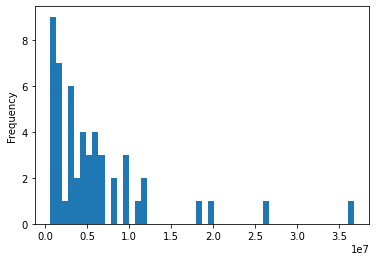

In [23]:
# Histogram with 50 bins
gdf['Total'].plot.hist(bins=50)

## Sorting

By sorting the data, I can find out what are the top 10 states with the highest population. To do this, I will first create a new object with the sorted values.

In [24]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [25]:
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
5,04000US06,36831969.0
44,04000US48,26261053.0
10,04000US12,19773422.0
33,04000US36,18418118.0
39,04000US42,12084967.0
14,04000US17,12003438.0
36,04000US39,10960686.0
11,04000US13,9747170.0
34,04000US37,9659751.0
23,04000US26,9394171.0


Now, I can plot it!

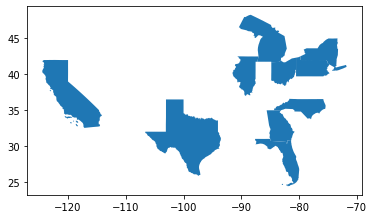

In [26]:
gdf_sorted.head(10).plot()

We can do better than that...

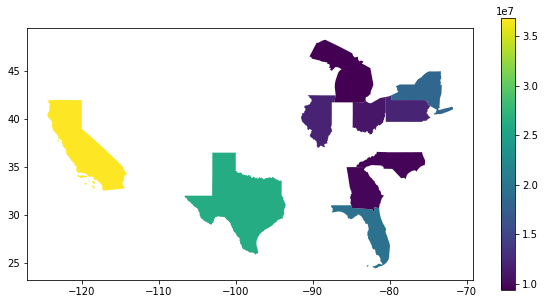

In [52]:
gdf_sorted.head(10).plot(figsize=(10,5),column='Total',legend=True)

## Normalizing the Data

To avoid any misrepresentations, I will normalize the data, and provide it as a percent of total. I will do this by creating new columns within the data frame with the percent values for each language.

In [28]:
gdf['Percent Speak only English'] = gdf['Speak only English']/gdf['Total']*100
gdf['Percent Spanish'] = gdf['Spanish:']/gdf['Total']*100
gdf['Percent French'] = gdf['French (incl. Cajun)']/gdf['Total']*100
gdf['Percent Portuguese'] = gdf['Portuguese:']/gdf['Total']*100
gdf['Percent Chinese'] = gdf['Chinese (incl. Mandarin, Cantonese):']/gdf['Total']*100
gdf['Percent Japanese'] = gdf['Japanese:']/gdf['Total']*100
gdf['Percent Korean'] = gdf['Korean:']/gdf['Total']*100


In [29]:
gdf.sample()

,geoid,State,Total,Speak only English,Spanish:,"Speak English ""very well""","Speak English less than ""very well""",French (incl. Cajun),"Speak English ""very well""","Speak English less than ""very well""",...,"Speak English ""very well""","Speak English less than ""very well""",geometry,Percent Speak only English,Percent Spanish,Percent French,Percent Portuguese,Percent Chinese,Percent Japanese,Percent Korean
42,04000US46,South Dakota,810239.0,758310.0,16458.0,10137.0,6321.0,1140.0,902.0,238.0,...,351.0,230.0,"MULTIPOLYGON (((-100.49937 45.94365, -100.4819...",93.590903,2.031253,0.140699,0.007529,0.161928,0.026782,0.071707


As shown in the sample above, there are seven new percent columns for each of the languages.

## Mapping

Now that I have a clearer understanding of the data and have created by own subset, I can begin to visualize it. The most obvious choice for census data is maps. I will be using `geopandas` to create the maps, and will be exploring different color schemes to see the different ways the data can be represented. The column I will be plotting is the 'Percent Speak only English' column.

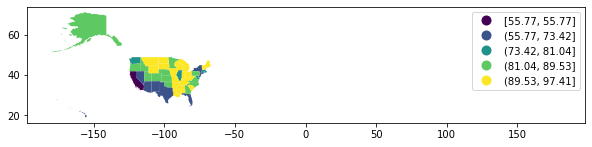

In [30]:
# Natural Breaks
gdf.plot(figsize=(10,10),
                 column='Percent Speak only English',
                 legend=True, 
                 scheme='NaturalBreaks')

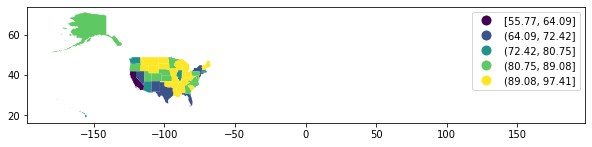

In [31]:
# Equal Interval
gdf.plot(figsize=(10,10),
                 column='Percent Speak only English',
                 legend=True, 
                 scheme='equal_interval')

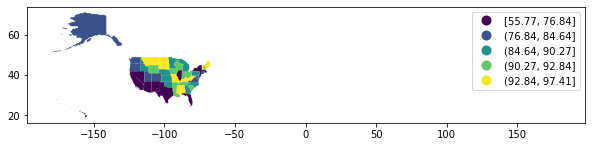

In [32]:
# Quantiles
gdf.plot(figsize=(10,10),
                 column='Percent Speak only English',
                 legend=True, 
                 scheme='quantiles')

### Multiple Plots
Using matplotlib's `subplot` command, I can create multiple plots in a row. In the following line, I will be creating four plots for the four languages I believe are most likely to have songs written in that language on the top charts: English, Spanish, Chinese, and Korean.

Text(0.5, 1.0, 'Percent Korean')

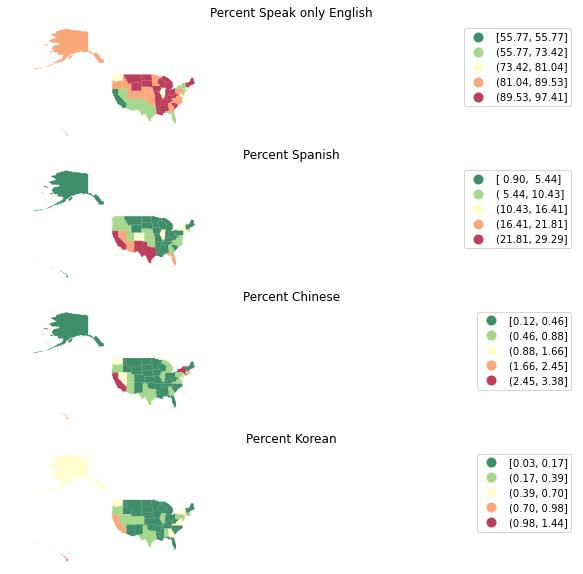

In [54]:
# create the 4x1 subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# name each subplot
ax1, ax2, ax3, ax4 = axs

# Percent Speak only English map
gdf.plot(column='Percent Speak only English', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0, 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Speak only English")

# Percent Spanish map
gdf.plot(column='Percent Spanish', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Spanish")

# Percent Chinese map
gdf.plot(column='Percent Chinese', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3, # this assigns the map to the subplot
            legend=True
           )

ax3.axis("off")
ax3.set_title("Percent Chinese")

# Percent Korean map
gdf.plot(column='Percent Korean', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax4, # this assigns the map to the subplot
            legend=True
           )

ax4.axis("off")
ax4.set_title("Percent Korean")

### Adding a Basemap

Adding a basemap can create a more interesting and informative visual. This can be down by reprojecting your geodataframe to Web Mercator, and adding a basemap, use the following guidelines. For this exploration, I will be plotting the states with more than 20% Spanish Speakers.

In [35]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

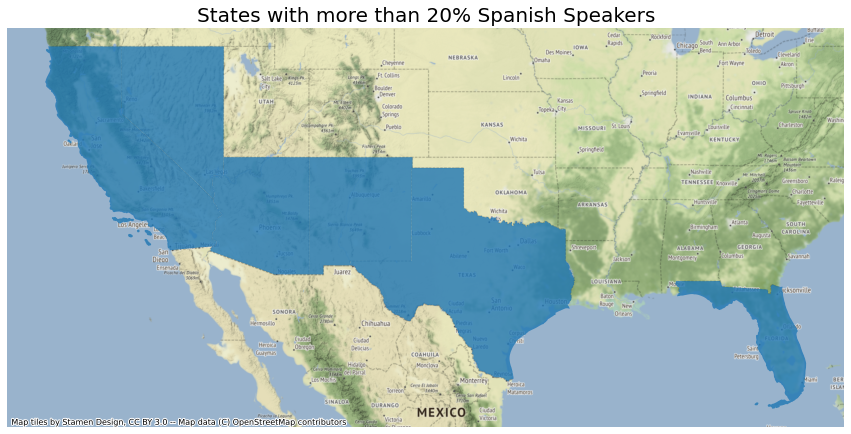

In [55]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Spanish'] > 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('States with more than 20% Spanish Speakers',fontsize=20)

# add a basemap
ctx.add_basemap(ax)